In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_dir = "../input/drowsiness-detection/"
train_datagen = ImageDataGenerator(validation_split=0.2) # don't use rescale = 1./255

train_generator = train_datagen.flow_from_directory( data_dir,
                                                     target_size=(32,32),
                                                     batch_size=32,
                                                     shuffle=True,
                                                     class_mode='categorical',
                                                     subset='training')

validation_datagen = ImageDataGenerator(validation_split=0.2)

validation_generator =  validation_datagen.flow_from_directory( data_dir,
                                                                target_size=(32,32),
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                subset='validation')   

Found 38400 images belonging to 2 classes.
Found 9600 images belonging to 2 classes.


In [3]:
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
#    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax')
])

In [4]:
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [5]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 64)        0

In [6]:
history = cnn_model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
1200/1200 [==============================] - 356s 291ms/step - loss: 3.9119 - categorical_accuracy: 0.9022 - precision: 0.9022 - recall: 0.9022 - val_loss: 0.1849 - val_categorical_accuracy: 0.9310 - val_precision: 0.9310 - val_recall: 0.9310
Epoch 2/10
1200/1200 [==============================] - 75s 63ms/step - loss: 0.0709 - categorical_accuracy: 0.9771 - precision: 0.9771 - recall: 0.9771 - val_loss: 0.2785 - val_categorical_accuracy: 0.9085 - val_precision: 0.9085 - val_recall: 0.9085
Epoch 3/10
1200/1200 [==============================] - 74s 62ms/step - loss: 0.0573 - categorical_accuracy: 0.9819 - precision: 0.9819 - recall: 0.9819 - val_loss: 0.1398 - val_categorical_accuracy: 0.9541 - val_precision: 0.9541 - val_recall: 0.9541
Epoch 4/10
1200/1200 [==============================] - 74s 62ms/step - loss: 0.0434 - categorical_accuracy: 0.9864 - precision: 0.9864 - recall: 0.9864 - val_loss: 0.2013 - val_categorical_accuracy: 0.9389 - val_precision: 0.9389 - val_recal

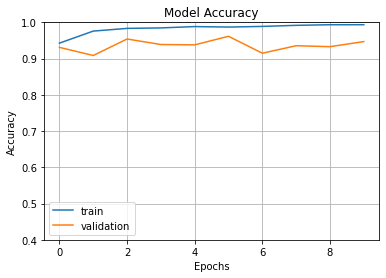

In [7]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
import cv2
img_height, img_width = 32,32
image=cv2.imread("../input/drowsiness-detection/closed_eye/s0001_00001_0_0_0_0_0_01.png")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [20]:
import cv2
img_height, img_width = 32,32
image=cv2.imread("../input/drowsiness-detection/closed_eye/s0001_00001_0_0_0_0_0_01.png")
print(image.shape)
r_eye = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
print(r_eye.shape)
r_eye = cv2.resize(r_eye, (img_height,img_width))
print(r_eye.shape)
#r_eye= r_eye/255
r_eye=  r_eye.reshape((-1, 32, 32, 3))
print(r_eye.shape)
#r_eye = np.expand_dims(r_eye,axis=0)
pred=cnn_model.predict(r_eye)

(86, 86, 3)
(86, 86, 3)
(32, 32, 3)
(1, 32, 32, 3)


In [22]:
np.argmax(pred)

0

In [8]:
import cv2
img_height, img_width = 32,32
image=cv2.imread("../input/drowsiness-detection/closed_eye/s0001_00001_0_0_0_0_0_01.png")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [9]:
pred=cnn_model.predict(image)

In [10]:
output_class=np.argmax(pred)
print("The predicted class is", output_class)
# 0 is close 1 is open

The predicted class is 0


In [11]:
cnn_model.save("./cnn.h5")

In [12]:
from keras.models import load_model
test_model = load_model('./cnn.h5')
pred = np.argmax(test_model.predict(image), axis=-1)
print(pred)

[0]


In [13]:
resnet50_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(32,32,3),
                   pooling='avg',classes=2,
                   weights= 'imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet50_model.add(pretrained_model)

94773248/94765736 [==============================] - 1s 0us/step


In [14]:
resnet50_model.add(Flatten())
resnet50_model.add(Dense(128, activation='relu'))
resnet50_model.add(Dense(2, activation='softmax'))

In [15]:
resnet50_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 23,850,242
Trainable params: 262,530
Non-trainable params: 23,587,712
_________________________________________________________________


In [16]:
resnet50_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history = resnet50_model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
1200/1200 [==============================] - 86s 69ms/step - loss: 0.1764 - categorical_accuracy: 0.9430 - precision_1: 0.9430 - recall_1: 0.9430 - val_loss: 0.3366 - val_categorical_accuracy: 0.8840 - val_precision_1: 0.8840 - val_recall_1: 0.8840
Epoch 2/10
1200/1200 [==============================] - 81s 68ms/step - loss: 0.0412 - categorical_accuracy: 0.9856 - precision_1: 0.9856 - recall_1: 0.9856 - val_loss: 0.4553 - val_categorical_accuracy: 0.8542 - val_precision_1: 0.8542 - val_recall_1: 0.8542
Epoch 3/10
1200/1200 [==============================] - 81s 68ms/step - loss: 0.0281 - categorical_accuracy: 0.9901 - precision_1: 0.9901 - recall_1: 0.9901 - val_loss: 0.5349 - val_categorical_accuracy: 0.8621 - val_precision_1: 0.8621 - val_recall_1: 0.8621
Epoch 4/10
1200/1200 [==============================] - 81s 68ms/step - loss: 0.0212 - categorical_accuracy: 0.9930 - precision_1: 0.9930 - recall_1: 0.9930 - val_loss: 0.6640 - val_categorical_accuracy: 0.8398 - val_pre

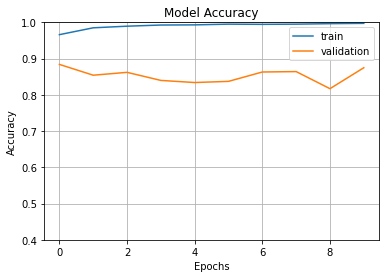

In [17]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [18]:
resnet50_model.save("./resnet50.h5")

In [19]:
resnet50_model_regularized = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(32,32,3),
                   pooling='avg',classes=2,
                   weights= 'imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet50_model_regularized.add(pretrained_model)

In [20]:
resnet50_model_regularized.add(Flatten())
resnet50_model_regularized.add(Dense(128, activation='relu'))
resnet50_model_regularized.add(Dropout(0.5))
resnet50_model_regularized.add(Dense(2, activation='softmax'))

In [21]:
resnet50_model_regularized.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history = resnet50_model_regularized.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
1200/1200 [==============================] - 87s 70ms/step - loss: 0.2082 - categorical_accuracy: 0.9293 - precision_2: 0.9293 - recall_2: 0.9293 - val_loss: 0.2404 - val_categorical_accuracy: 0.9118 - val_precision_2: 0.9118 - val_recall_2: 0.9118
Epoch 2/10
1200/1200 [==============================] - 85s 70ms/step - loss: 0.0738 - categorical_accuracy: 0.9728 - precision_2: 0.9728 - recall_2: 0.9728 - val_loss: 0.3570 - val_categorical_accuracy: 0.8835 - val_precision_2: 0.8835 - val_recall_2: 0.8835
Epoch 3/10
1200/1200 [==============================] - 85s 71ms/step - loss: 0.0575 - categorical_accuracy: 0.9787 - precision_2: 0.9787 - recall_2: 0.9787 - val_loss: 0.3892 - val_categorical_accuracy: 0.8746 - val_precision_2: 0.8746 - val_recall_2: 0.8746
Epoch 4/10
1200/1200 [==============================] - 85s 71ms/step - loss: 0.0499 - categorical_accuracy: 0.9819 - precision_2: 0.9819 - recall_2: 0.9819 - val_loss: 0.3167 - val_categorical_accuracy: 0.8908 - val_pre

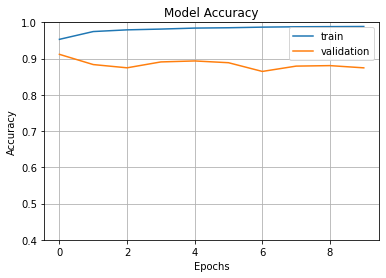

In [22]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [23]:
resnet50_model_regularized.save("./resnet50_model_regularized.h5")

<a href="./resnet50_model_regularized.h5"> Download ResNet50 Regularized File </a>

In [40]:
resnet50_fine_tune1 = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(32,32,3),
                   pooling='avg',classes=2,
                   weights= 'imagenet')
for layer in pretrained_model.layers:
        layer.trainable=True

resnet50_fine_tune.add(pretrained_model)

In [41]:
resnet50_fine_tune1.add(Flatten())
resnet50_fine_tune1.add(Dense(128, activation='relu'))
resnet50_fine_tune1.add(Dropout(0.5))
resnet50_fine_tune1.add(Dense(2, activation='softmax'))

In [42]:
resnet50_fine_tune1.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history = resnet50_fine_tune1.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
1200/1200 [==============================] - 95s 74ms/step - loss: 0.2215 - categorical_accuracy: 0.9311 - precision_4: 0.9311 - recall_4: 0.9311 - val_loss: 0.5102 - val_categorical_accuracy: 0.8756 - val_precision_4: 0.8756 - val_recall_4: 0.8756
Epoch 2/10
1200/1200 [==============================] - 87s 72ms/step - loss: 0.0243 - categorical_accuracy: 0.9932 - precision_4: 0.9932 - recall_4: 0.9932 - val_loss: 0.1330 - val_categorical_accuracy: 0.9654 - val_precision_4: 0.9654 - val_recall_4: 0.9654
Epoch 3/10
1200/1200 [==============================] - 86s 71ms/step - loss: 0.0727 - categorical_accuracy: 0.9774 - precision_4: 0.9774 - recall_4: 0.9774 - val_loss: 0.2217 - val_categorical_accuracy: 0.9277 - val_precision_4: 0.9277 - val_recall_4: 0.9277
Epoch 4/10
1200/1200 [==============================] - 86s 72ms/step - loss: 0.0592 - categorical_accuracy: 0.9814 - precision_4: 0.9814 - recall_4: 0.9814 - val_loss: 0.3647 - val_categorical_accuracy: 0.8930 - val_pre

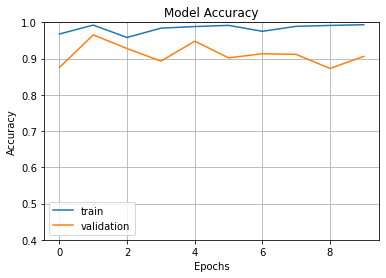

In [43]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [39]:
resnet50_fine_tune.save("./resnet50_fine_tune.h5")

<a href="./resnet50.h5"> Download ResNet50 File </a>

<a href="./resnet50_fine_tune.h5"> Download fine_tune ResNet50 File </a>